In [2]:
# Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset
df = pd.read_csv("Flight_Booking.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Visualization

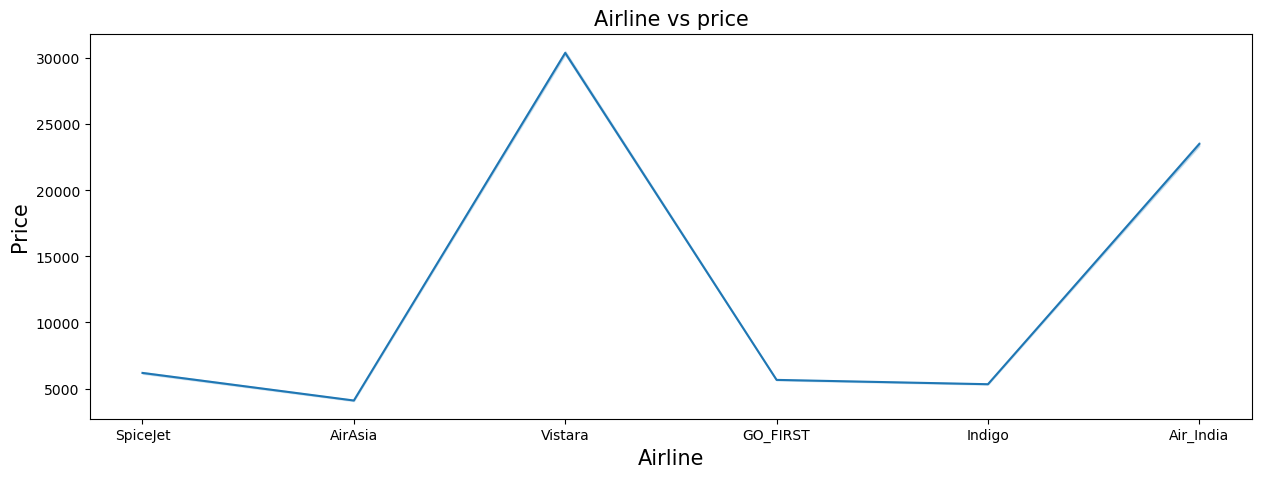

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airline vs price', fontsize = 15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

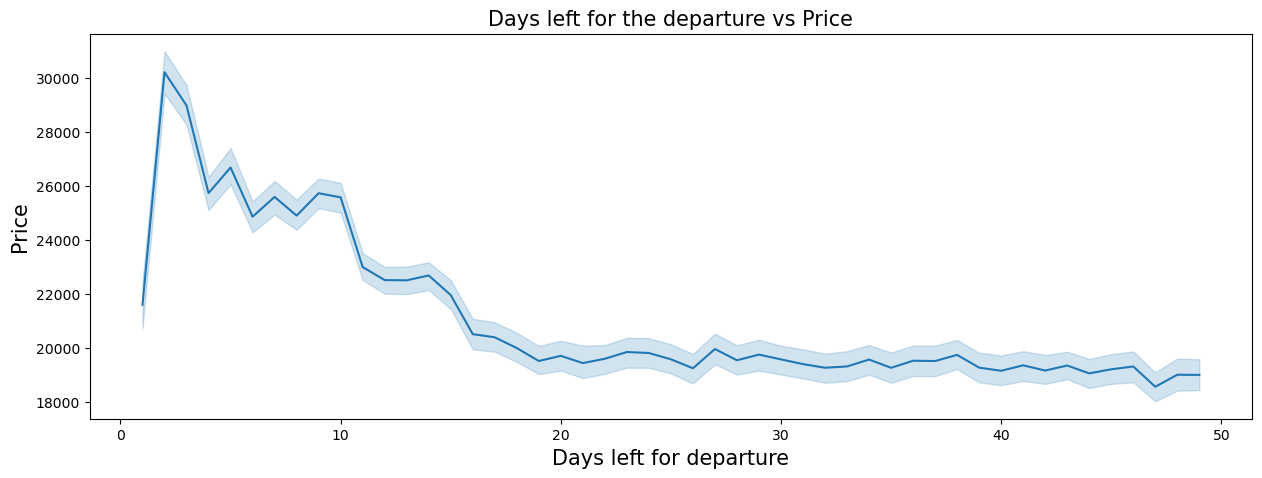

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'], y=df['price'])
plt.title('Days left for the departure vs Price', fontsize = 15)
plt.xlabel('Days left for departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

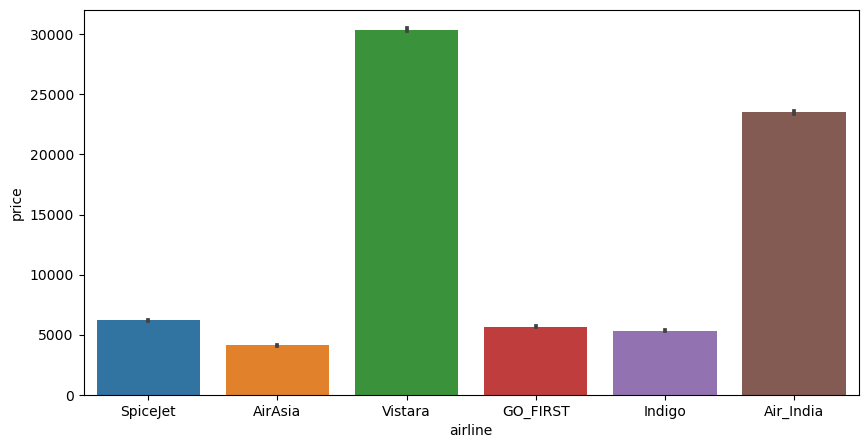

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)

<Axes: xlabel='class', ylabel='price'>

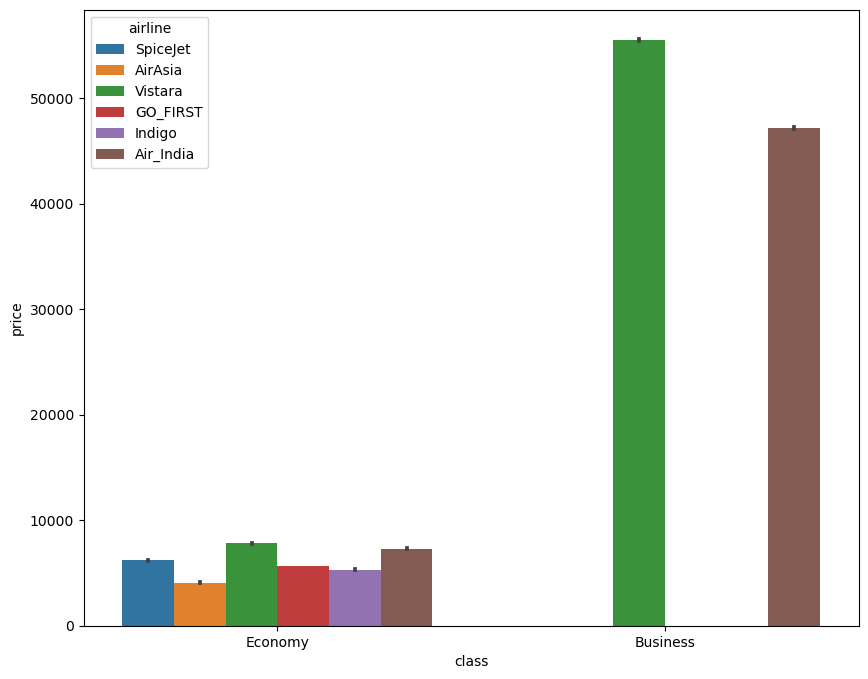

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',y='price',data=df,hue='airline')

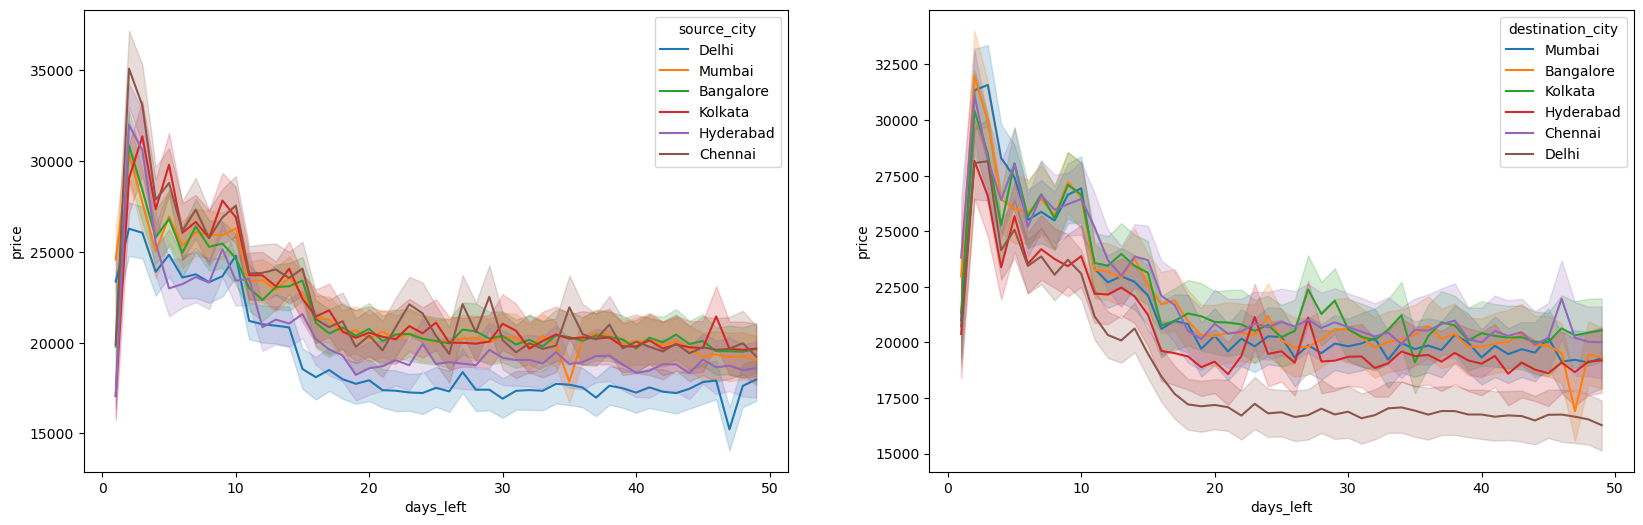

In [12]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left', y='price',data=df, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left', y='price',data=df, hue='destination_city', ax=ax[1])
plt.show()

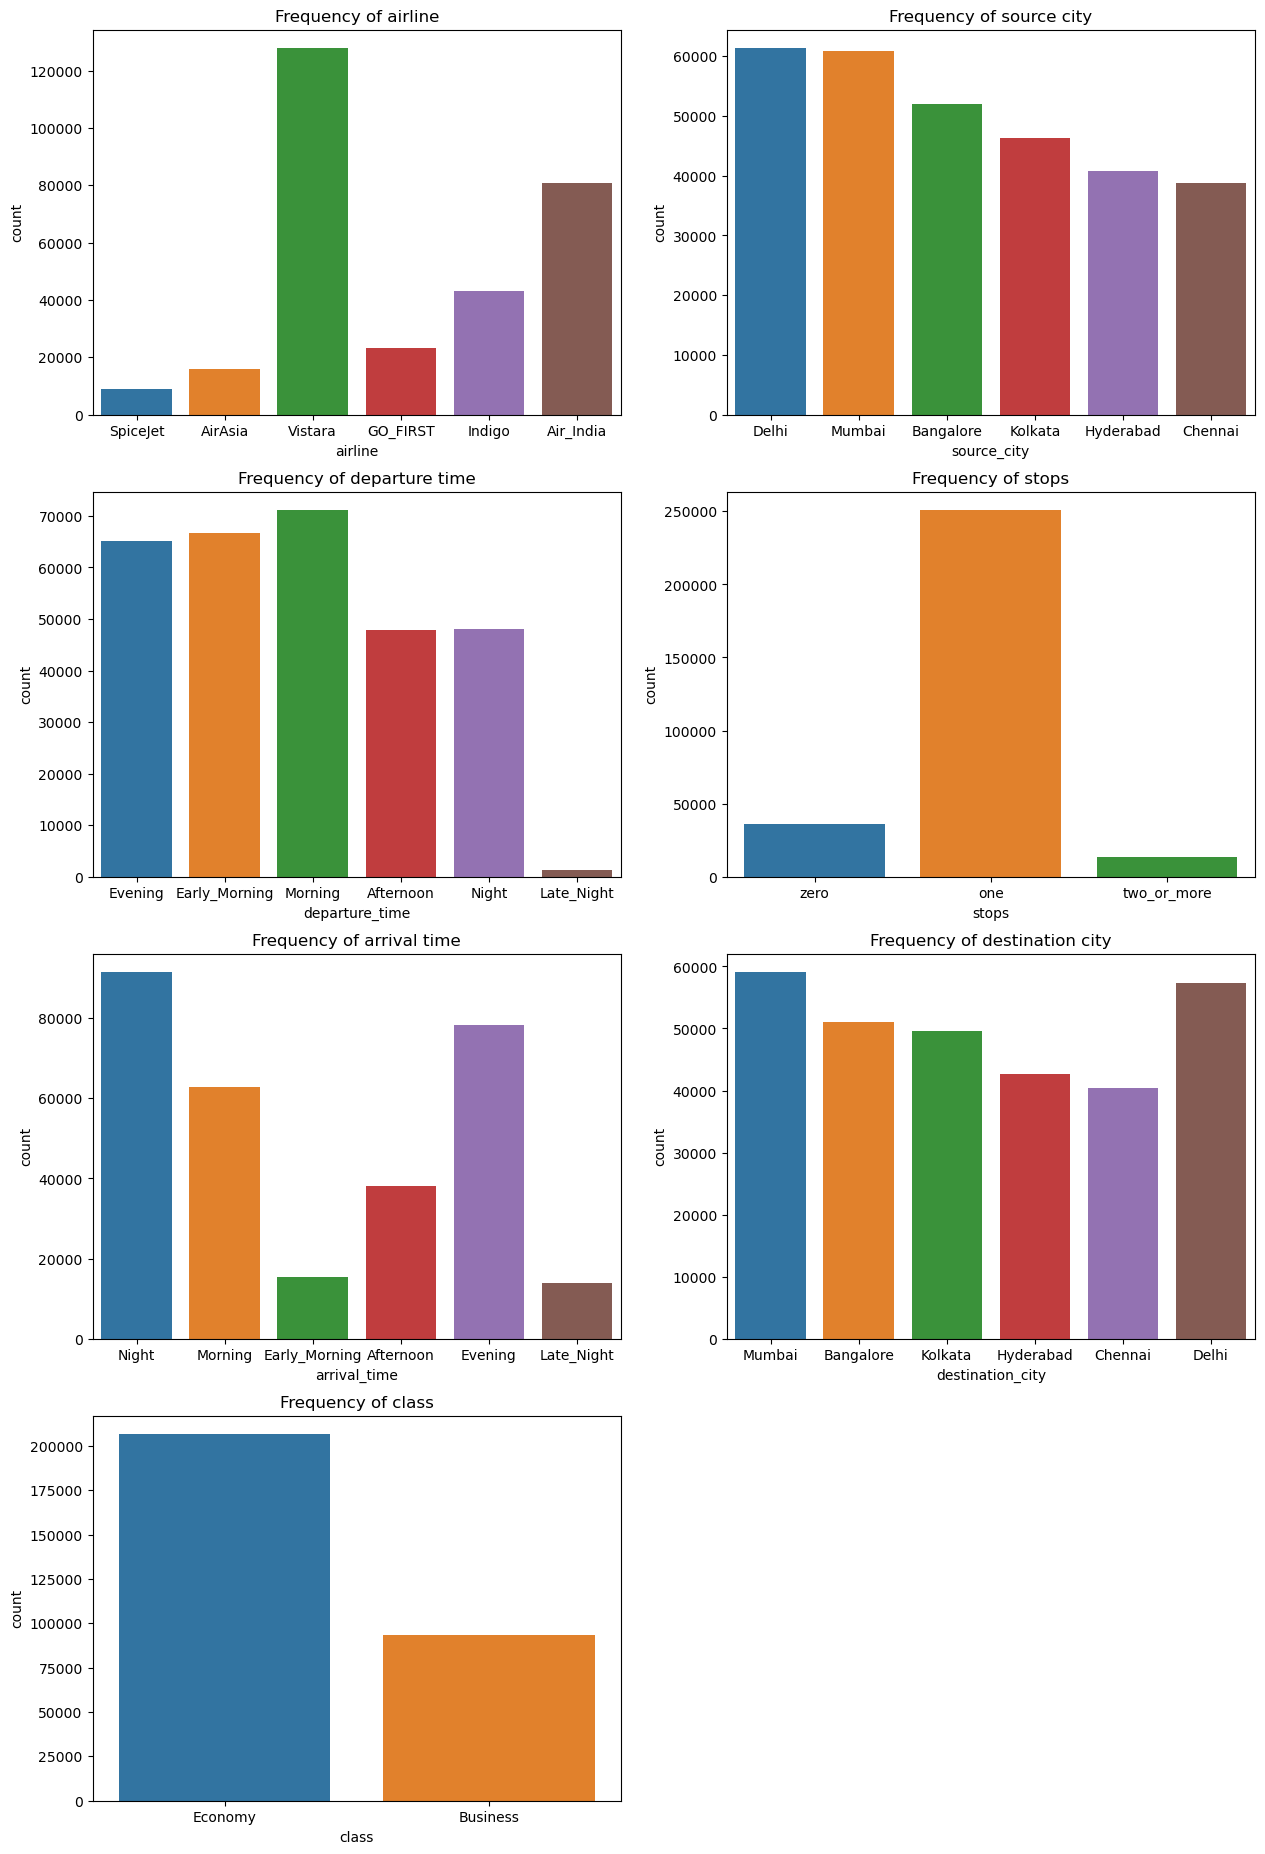

In [13]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'], data=df)
plt.title('Frequency of airline')

plt.subplot(4,2,2)
sns.countplot(x='source_city', data=df)
plt.title("Frequency of source city")

plt.subplot(4,2,3)
sns.countplot(x='departure_time', data=df)
plt.title("Frequency of departure time")

plt.subplot(4,2,4)
sns.countplot(x='stops', data=df)
plt.title("Frequency of stops")

plt.subplot(4,2,5)
sns.countplot(x='arrival_time', data=df)
plt.title("Frequency of arrival time")

plt.subplot(4,2,6)
sns.countplot(x='destination_city', data=df)
plt.title("Frequency of destination city")

plt.subplot(4,2,7)
sns.countplot(x='class', data=df)
plt.title("Frequency of class")

plt.show()

In [14]:
# Encoding the object vlues
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


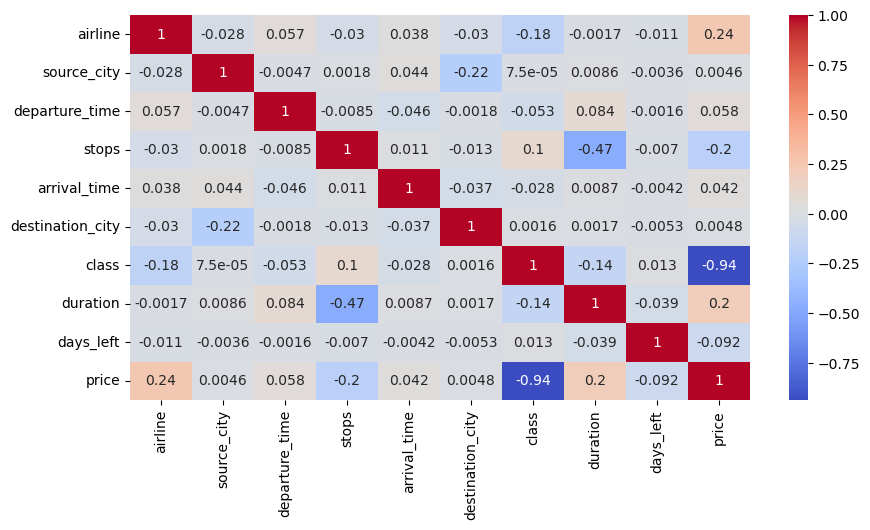

In [44]:
# Genearating a heat map
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.show()

In [16]:
# A variance inflation factor (VIF) is a measure of the amount of multicollinearity or colinearity in regression analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)


           features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# Linear Regression

In [17]:
df = df.drop(columns=['flight']) 

In [18]:
X = df.drop(columns=['price'])
y = df['price']

In [19]:
X.head(), y.head()

(   airline  source_city  departure_time  stops  arrival_time  \
 0        4            2               2      2             5   
 1        4            2               1      2             4   
 2        0            2               1      2             1   
 3        5            2               4      2             0   
 4        5            2               4      2             4   
 
    destination_city  class  duration  days_left  
 0                 5      1      2.17          1  
 1                 5      1      2.33          1  
 2                 5      1      2.17          1  
 3                 5      1      2.25          1  
 4                 5      1      2.33          1  ,
 0    5953
 1    5953
 2    5956
 3    5955
 4    5955
 Name: price, dtype: int64)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [23]:
difference = pd.DataFrame(np.c_[y_test,y_pred], columns = ['Actual Values', 'Predicted Values'])
difference

,Actual Values,Predicted Values
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.904554350718816

In [25]:
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

4624.9948680168745

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.4353581089683254

In [27]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

49200540.293722

In [28]:
root_mean_sq_error = np.sqrt(mean_sq_error)
root_mean_sq_error

7014.309680483319

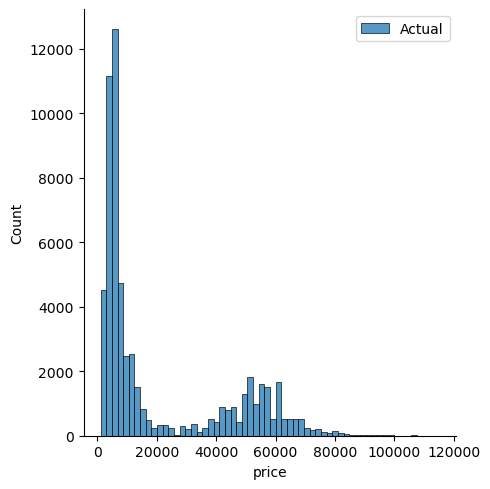

In [40]:
sns.displot(y_test, label='Actual')
plt.legend()

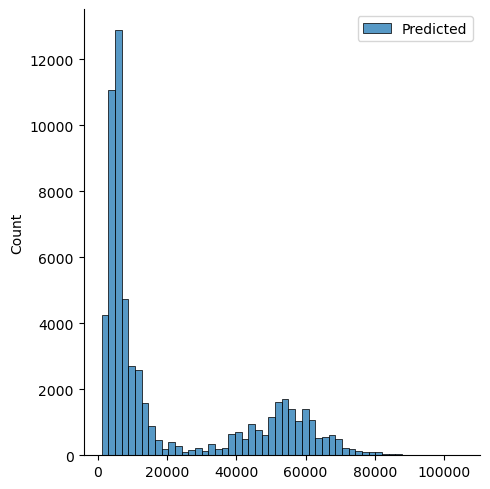

In [39]:
sns.displot(y_pred, label='Predicted')
plt.legend()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('R2 Score :',r2_score(y_test,y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error: ',mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
print('percentage error: ',mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print('Mean square error: ',mean_sq_error)
root_mean_sq_error = np.sqrt(mean_sq_error)
print('Root mean square error: ',root_mean_sq_error)

R2 Score : 0.9755068439005554
Mean absolute error:  1176.196692819821
percentage error:  0.07406475786923299
Mean square error:  12625787.793018976
Root mean square error:  3553.2784570054423


# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print('R2 Score :', r2_score(y_test,y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error: ',mean_abs_error)
print('percentage error: ',mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print('Mean square error: ',mean_sq_error)
root_mean_sq_error = np.sqrt(mean_sq_error)
print('Root mean square error: ',root_mean_sq_error)

R2 Score : 0.9849489110931665
Mean absolute error:  1089.2300308326148
percentage error:  0.07035896690536392
Mean square error:  7758569.529381769
Root mean square error:  2785.42088909051


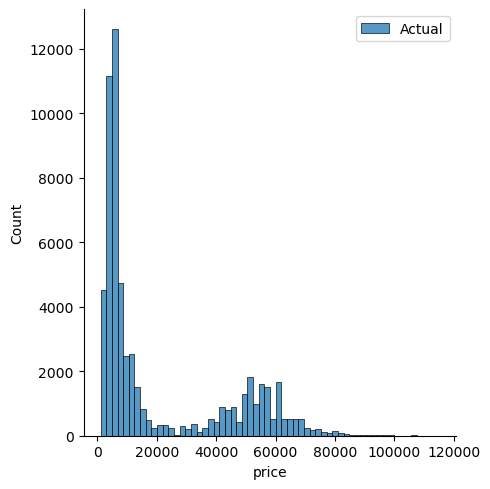

In [42]:
sns.displot(y_test,label='Actual')
plt.legend()

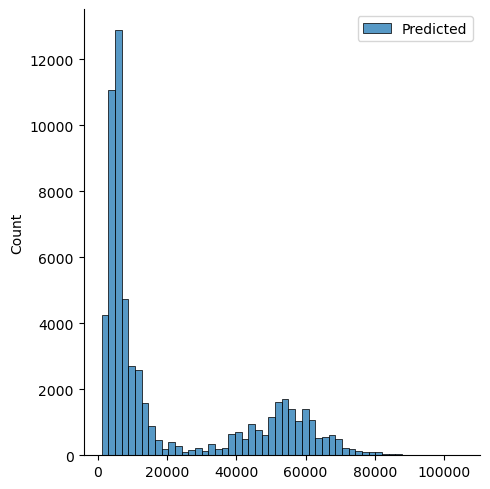

In [43]:
sns.displot(y_pred,label='Predicted')
plt.legend()